In [51]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm, probplot
import statsmodels.api as sm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')
# # plt.style.use('ggplot')

In [52]:
#lendo informação obtida no site coinmarketcap.com
#current = pd.read_json('https://api.coinmarketcap.com/v1/ticker/') 
cmc_2017 = pd.read_csv("coinmarketcap_06122017.csv")
#imprimindo as primeiras linhas do dataset
cmc_2017.head(10)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10
5,5,2.289430e+08,7.736420e+06,dash,1512549542,5.794076e+09,1.890000e+07,Dash,1.22,-3.31,10.64,0.059856,748.935000,6,DASH,7.736420e+06
6,6,4.093420e+08,5.415391e+07,litecoin,1512549542,5.634498e+09,8.400000e+07,Litecoin,-0.17,0.80,3.68,0.008316,104.046000,7,LTC,5.415391e+07
7,7,1.384070e+08,1.669097e+07,bitcoin-gold,1512549582,4.920065e+09,2.100000e+07,Bitcoin Gold,-0.86,-8.65,-11.24,0.023559,294.774000,8,BTG,1.679097e+07
8,8,5.498600e+08,1.544296e+07,monero,1512549544,4.331688e+09,NaN,Monero,-2.00,25.65,41.23,0.022418,280.496000,9,XMR,1.544296e+07
9,9,6.164750e+07,2.592707e+10,cardano,1512549579,3.231420e+09,4.500000e+10,Cardano,-0.28,-5.80,-8.25,0.000010,0.124635,10,ADA,3.111248e+10


In [53]:
#realizando os mesmos passos feitos acima para 2018
cmc_2018 = pd.read_csv("coinmarketcap_06012018.csv")
cmc_2018.head(10)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,22081300000,16785225,bitcoin,1515230661,284909052105,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,16785225
1,1,5221370000,38739144847,ripple,1515230641,119207709132,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,99993093880
2,2,5705690000,96803840,ethereum,1515230649,100115499075,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,96803840
3,3,1569900000,16896225,bitcoin-cash,1515230652,44424061657,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,16896225
4,4,428305000,25927070538,cardano,1515230654,25916647856,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,31112483745
5,5,2105240000,54637708,litecoin,1515230641,16574020942,8.400000e+07,Litecoin,2.31,22.26,32.85,0.018337,303.344000,6,LTC,54637708
6,6,146039000,8999999999,nem,1515230644,14813369998,NaN,NEM,-1.82,-2.53,69.65,0.000099,1.645930,7,XEM,8999999999
7,7,656389000,17877794558,stellar,1515230643,12634630726,NaN,Stellar,1.58,-4.94,110.28,0.000043,0.706722,8,XLM,103570548975
8,8,2971610000,65748192475,tron,1515230654,11741640953,NaN,TRON,-1.80,-12.63,434.36,0.000011,0.178585,9,TRX,100000000000
9,9,194039000,2779530283,iota,1515230652,11143859582,2.779530e+09,IOTA,-3.03,0.89,19.45,0.000242,4.009260,10,MIOTA,2779530283


In [54]:
# #juntando ambos os datasets --> NAO FAZ MUITO SENTIDO
# cmc = pd.merge(cmc_2017,cmc_2018,on="")
# cmc.head()

In [55]:
#listando as colunas do dataset
list(cmc_2017)

['Unnamed: 0',
 '24h_volume_usd',
 'available_supply',
 'id',
 'last_updated',
 'market_cap_usd',
 'max_supply',
 'name',
 'percent_change_1h',
 'percent_change_24h',
 'percent_change_7d',
 'price_btc',
 'price_usd',
 'rank',
 'symbol',
 'total_supply']

In [56]:
# cmc_2017["name"].value_counts(True)*100

In [57]:
# dfc = cmc_2017["name"].value_counts()
# dfc.plot(kind='bar', legend=False)
# GRAFICO ABSURDAMENTE PESADO

In [58]:
# Selecionando as colunas 'name' e 'market_cap_usd'
market_cap_2017 = cmc_2017[['name', 'market_cap_usd']]
market_cap_2018 = cmc_2018[['name', 'market_cap_usd']]

# Contando o número de valores de cada uma delas
market_cap_2017.count()

name              1326
market_cap_usd    1031
dtype: int64

nota-se que há mais ids que market caps!

In [59]:
# Filtrando as linhas sem um market capitalization
# market_cap = market_cap.query('market_cap_usd > 0')
market_cap_2017 = market_cap_2017[market_cap_2017["market_cap_usd"]>0]
market_cap_2018 = market_cap_2018[market_cap_2018["market_cap_usd"]>0]

# Contando o número de valores novamente
market_cap_2017.count()

name              1031
market_cap_usd    1031
dtype: int64

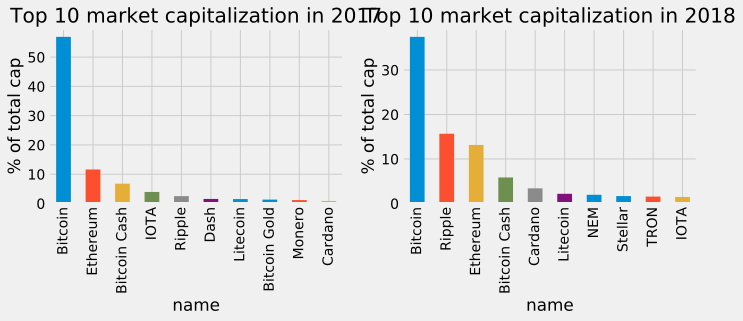

In [60]:
# Selecionando as 10 primeiras linhas e setando o index via nome da moeda
market_cap10_2017 = market_cap_2017.head(10).set_index('name')
market_cap10_2018 = market_cap_2018.head(10).set_index('name')

# Calculando porcentagem do market cap da moeda em relação ao total
market_cap10_2017 = market_cap10_2017.assign(market_cap_perc_2017 = lambda x: (x["market_cap_usd"] / market_cap_2017["market_cap_usd"].sum()) * 100)
market_cap10_2018 = market_cap10_2018.assign(market_cap_perc_2018 = lambda x: (x["market_cap_usd"] / market_cap_2018["market_cap_usd"].sum()) * 100)

# Plotando o gráfico de barras para analisar o tamanho que cada moeda tem no mercado de criptos
plt.figure(figsize=(16,3))
plt.subplot(131)
plot = market_cap10_2017.market_cap_perc_2017.plot.bar(title='Top 10 market capitalization in 2017')
plot.set_ylabel('% of total cap')

plt.subplot(132)
plot = market_cap10_2018.market_cap_perc_2018.plot.bar(title='Top 10 market capitalization in 2018')
plot.set_ylabel('% of total cap');

Se formos analisar as top 3 criptomoedas mais dominantes do mercado em ambos os anos, conseguimos perceber duas que foram recorrentes: BITCOIN E ETHEREUM.

In [61]:
# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")
# look at the first few rows
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047
1,2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320
2,2018-11-19,5620.78,5620.78,4842.91,4871.49,7039560000,84688539692
3,2018-11-18,5559.74,5653.61,5559.74,5623.54,4159680000,97753714643
4,2018-11-17,5578.58,5578.58,5519.56,5554.33,4303150000,96542098114


In [62]:
# get market info for ethereum from the start of 2016 to the current day
ethereum_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
ethereum_market_info = ethereum_market_info.assign(Date=pd.to_datetime(ethereum_market_info['Date']))
# when Volume is equal to '-' convert it to 0
# ethereum_market_info.loc[ethereum_market_info['Volume']=="-",'Volume']=0
# convert to int
ethereum_market_info['Volume'] = ethereum_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
ethereum_market_info.columns = ethereum_market_info.columns.str.replace("*", "")
# look at the first few rows
ethereum_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-11-21,131.14,138.89,125.76,136.70,2685930000,14127420909
1,2018-11-20,148.81,151.25,126.36,130.34,3134410000,13467303239
2,2018-11-19,177.18,177.18,147.85,149.18,2745160000,15410551811
3,2018-11-18,174.18,179.15,174.18,177.07,1810920000,18288411984
4,2018-11-17,175.36,175.85,172.87,174.00,1832800000,17968221715


In [63]:
bitcoin_market_info['Close'].describe()

count     2034.000000
mean      2280.187173
std       3443.225874
min         68.430000
25%        320.270000
50%        596.425000
75%       2576.057500
max      19497.400000
Name: Close, dtype: float64

In [64]:
#bitcoin_market_info['Volume'].describe()

In [65]:
ethereum_market_info['Close'].describe()

count    1203.000000
mean      214.045211
std       278.868059
min         0.434829
25%         9.965000
50%        45.300000
75%       326.770000
max      1396.420000
Name: Close, dtype: float64

In [66]:
#ethereum_market_info['Volume'].describe()

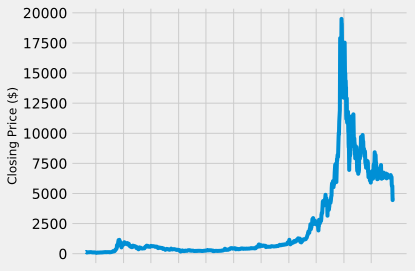

In [67]:
fig, ax1 = plt.subplots(1,1, gridspec_kw = {'height_ratios':[3]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['Close'])
fig.tight_layout()
plt.show()

In [98]:
Ouro = pd.read_excel('XAU_USD Historical Data (1) 2.xlsx')
Ouro = Ouro.assign(Date=pd.to_datetime(Ouro['Date']))
Ouro["Delta Ouro"] = Ouro["Price"] - Ouro["Open"]
Ouro.set_index('Date',inplace = True)
Ouro.head()

,Price,Open,High,Low,Change %,Delta Ouro
Date,,,,,,
2018-11-21,1225.83,1221.74,1230.12,1219.87,0.0035,4.09
2018-11-20,1221.55,1224.37,1229.17,1219.67,-0.0020,-2.82
2018-11-19,1224.05,1221.76,1225.26,1217.52,0.0012,2.29
2018-11-18,1222.62,1222.49,1222.84,1221.69,0.0009,0.13
2018-11-16,1221.47,1213.02,1225.37,1212.48,0.0070,8.45


In [99]:
bitcoin_market_info['Delta Bitcoin'] = bitcoin_market_info['Close'] - bitcoin_market_info['Open']
bitcoin_market_info.head()

,Open,High,Low,Close,Volume,Market Cap,Delta,Delta Bitcoin
Date,,,,,,,,
2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047,136.63,136.63
2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320,-412.06,-412.06
2018-11-19,5620.78,5620.78,4842.91,4871.49,7039560000,84688539692,-749.29,-749.29
2018-11-18,5559.74,5653.61,5559.74,5623.54,4159680000,97753714643,63.80,63.80
2018-11-17,5578.58,5578.58,5519.56,5554.33,4303150000,96542098114,-24.25,-24.25


In [100]:
#Cruza as duas tabelas (bitcoin e ouro) via data
df = pd.concat([bitcoin_market_info['Delta Bitcoin'], Ouro["Delta Ouro"]], axis=1)

In [102]:
df.tail()

,Delta Bitcoin,Delta Ouro
Date,,
2018-11-17,-24.25,NaN
2018-11-18,63.80,0.13
2018-11-19,-749.29,2.29
2018-11-20,-412.06,-2.82
2018-11-21,136.63,4.09


REGRESSÃO LINEAR SIMPLES

In [108]:
#Seleciona o preço final da moeda e do ouro, além de remover os NaNs
simples = df[['Delta Bitcoin','Delta Ouro']].dropna()

# #Transforma a renda na escala de milhares de dólares
# df['2010_income'] /= 1000

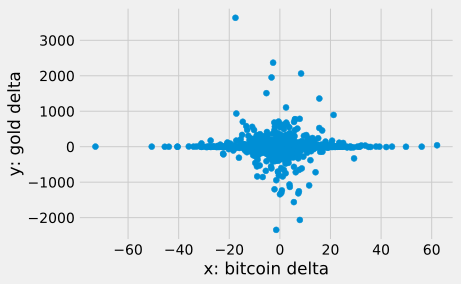

In [113]:
y = simples['Delta Bitcoin'] #preco do bitcoin
x = simples['Delta Ouro'] #preco do ouro
plt.scatter(x,y);
plt.xlabel("x: bitcoin delta");
plt.ylabel("y: gold delta");

In [114]:
yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 1.3188081103632043
beta1: -0.49263345833517763


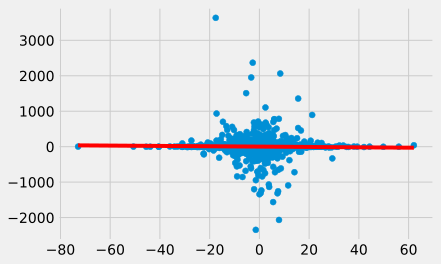

In [115]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y) # dados

In [116]:
xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delta Bitcoin   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7209
Date:                Wed, 21 Nov 2018   Prob (F-statistic):              0.396
Time:                        22:51:12   Log-Likelihood:                -10233.
No. Observations:                1477   AIC:                         2.047e+04
Df Residuals:                    1475   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3188      6.432      0.205      0.838     -11.298      13.936
Delta Ouro    -0.4926      0.580     -0.849      0.396      -1.631       0.645
==============================================================================
Omnibus:                      944.323   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204753.707
Skew:                           1.879   Prob(JB):                         0.00
Kurtosis:                      60.558   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

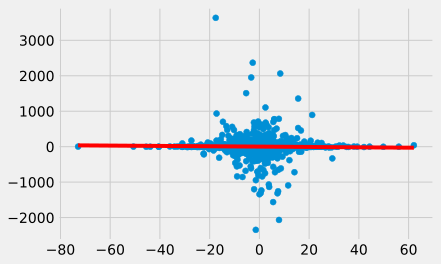

In [117]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);

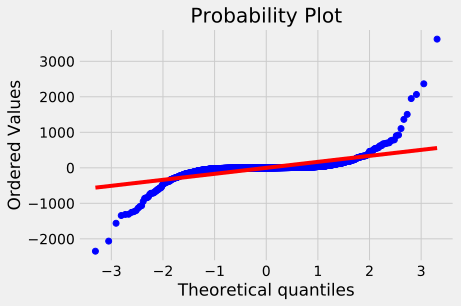

In [118]:
#verificando normalidade dos resíduos
probplot(results.resid, dist="norm", plot=plt);

In [28]:
# bitcoin = bitcoin_market_info[::-1]
# x = bitcoin['Close'].values
# y = Ouro['USD$'][((len(Ouro['Data']))-(len(bitcoin['Date']))):len(Ouro['Data'])].values
# plt.scatter(x,y);
# plt.xlabel("x: bitcoin closing");
# plt.ylabel("y: gold value");

In [29]:
# y_ = y.mean()
# x_ = x.mean()

# Sxy = ((x -x_)*(y -y_)).sum()
# Sxx = ((x -x_)**2).sum()

# b1 = Sxy/Sxx
# b0 = y_ - b1*x_

# print("beta0: {0}".format(b0))
# print("beta1: {0}".format(b1))


In [30]:
# x_v = np.linspace(x.min(), x.max(), 500)
# y_v = b0 + b1*x_v

In [31]:
# plt.plot(x_v,y_v, color="r") # resultados da regressão
# plt.scatter(x, y); # dados

In [32]:
# ei = y - b0 
# ei

In [33]:
# probplot(ei, dist = "norm", plot = plt)

In [34]:
# xa = sm.add_constant(x)
# model = sm.OLS(y,xa)
# results = model.fit()
# results.summary()

In [35]:
# x_vc = sm.add_constant(x_v)
# y_vc = results.predict(x_vc)
# plt.plot(x_v, y_vc, color="r")
# plt.scatter(x,y);

REGRESSÃO LINEAR MÚLTIPLA

In [36]:
# Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [37]:
multipla = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'USD$']].dropna()

In [38]:
Y = multipla['USD$']
X = multipla[['Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap']]

In [39]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   USD$   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     21.68
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           1.70e-24
Time:                        13:33:31   Log-Likelihood:                -8217.5
No. Observations:                1445   AIC:                         1.645e+04
Df Residuals:                    1438   BIC:                         1.649e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1225.0548      3.122    392.443      0.000    1218.931    1231.178
Open           0.0180      0.017      1.045      0.296      -0.016       0.052
High          -0.0349      0.024     -1.430      0.153      -0.083       0.013
Low            0.0198      0.019      1.020      0.308      -0.018       0.058
Close          0.2295      0.037      6.132      0.000       0.156       0.303
Volume      2.566e-09   2.57e-09      1.000      0.318   -2.47e-09     7.6e-09
Market Cap -1.339e-08   1.77e-09     -7.585      0.000   -1.69e-08   -9.93e-09
==============================================================================
Omnibus:                        9.280   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               12.725
Skew:                           0.013   Prob(JB):                      0.00172
Kurtosis:                       3.459   Cond. No.                     1.15e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X3 = multipla[['Low',
       'Volume']]
results3 = regress(X3, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   USD$   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     33.68
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           5.07e-15
Time:                        13:33:31   Log-Likelihood:                -8247.1
No. Observations:                1445   AIC:                         1.650e+04
Df Residuals:                    1442   BIC:                         1.652e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1240.4074      2.448    506.665      0.000    1235.605    1245.210
Low            0.0030      0.002      1.860      0.063      -0.000       0.006
Volume      1.918e-09    1.7e-09      1.130      0.259   -1.41e-09    5.25e-09
==============================================================================
Omnibus:                        5.526   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.708
Skew:                          -0.108   Prob(JB):                       0.0576
Kurtosis:                       3.220   Cond. No.                     4.44e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
c = results3.params["const"]
w = results3.params["Low"]
y = results3.params["Volume"]

In [42]:
def f(low, volume):
    return c+w*low + y*volume

In [43]:
npoints = 100
low = np.linspace(X3["Low"].min(), X3["Low"].max(), npoints)
volume = np.linspace(X3["Volume"].min(), X3["Volume"].max(), npoints)


In [44]:
low_xx, volume_yy = np.meshgrid(low, volume)

In [45]:
z = f(low_xx, volume_yy)

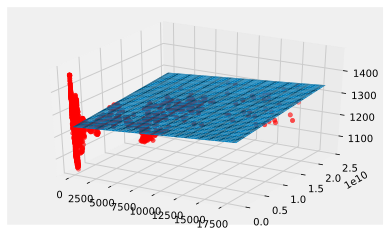

In [46]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(low_xx, volume_yy, z)
plt3d.scatter(X3["Low"],X3["Volume"], Y , color="r")